In [276]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import numpy as np
#matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

In [277]:
test_file_loc= 'Data/test.csv'
train_file_loc = 'Data/train.csv'

df_test_set = pd.DataFrame.from_csv(test_file_loc, index_col=None)
df_train_set = pd.DataFrame.from_csv(train_file_loc, index_col=None)

In [278]:
df_train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [279]:
df_test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We see that the test set has one column less. 
Let's join the two datasets for now

In [280]:
total_df = df_train_set.drop(['Survived'], axis=1).append(df_test_set)
total_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [281]:
total_df.shape

(1309, 11)

# Feature Engineering

In [282]:
categorical_features = ['Embarked', 'Sex', 'Pclass'] 
ordinal_features = ['Age' ]
numerical_features = ['Parch', 'SibSp', 'Fare']
ignored_features = ['Ticket', 'Cabin', 'Name', 'Sex']
output_feature = ['Survived']
columns_to_plot = categorical_features + ordinal_features + numerical_features + output_feature

First let's start with some obvious things like one hot encoding 

In [283]:
def one_hot_encoding(categorical_variables, dataframe):
    """
    Function to convert categorical features to one-hot
    encoded features
    
    :param: categorical_variables list of categorical features
    :param: dataframe the dataframe to one-hot-encode
    :returns: pd.DataFrame()
    """
    return pd.get_dummies(dataframe, columns=categorical_variables, drop_first=True)

In [284]:
df_transformed = one_hot_encoding(categorical_features, total_df)
df_transformed.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0,0,0
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1,0,1


In [285]:
df_transformed.describe()

,PassengerId,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,29.881138,0.498854,0.385027,33.295479,0.093965,0.698243,0.644003,0.211612,0.541635
std,378.020061,14.413493,1.041658,0.865560,51.758668,0.291891,0.459196,0.478997,0.408607,0.498454
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,1.000000
75%,982.000000,39.000000,1.000000,0.000000,31.275000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1309.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [286]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Name           1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
Sex_male       1309 non-null uint8
Pclass_2       1309 non-null uint8
Pclass_3       1309 non-null uint8
dtypes: float64(2), int64(3), object(3), uint8(5)
memory usage: 98.4+ KB


We have missing values in the columns: age, Fare Cabin. So these are columns we can process. Other columns that we can can also process is names. Let's see why

In [287]:
df_transformed['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

We notice that all the names have a title, i.e. "Mr", "Miss", etc. Let's extract these. 

In [288]:
def process_titles(df):
    df['Title'] = df['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
#     This yields in the following unique titles:
#     array(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major',
#        'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
#        'the Countess'], dtype=object)
#     We can further reduce this to: 
    title_mapping = {
        'Capt': 'Officer',
        'Col' : 'Officer',
        'Don' : 'Royalty',
        'Dona': 'Royalty',
        'Dr'  : 'Officer',
        'Jonkheer': 'Royalty',
        'Lady' : 'Royalty',
        'Major' : 'Officer',
        'Master': 'Master',
        'Miss' : 'Miss',
        'Mlle' : 'Miss',
        'Mme' : 'Mrs',
        'Mr' : 'Mr',
        'Mrs': 'Mrs',
        'Ms' : 'Ms',
        'Rev' : 'Officer',
        'Sir' : 'Royalty',
        'the Countess': 'Royalty'
    }
    df['Title'] = df.Title.map(title_mapping)
    return df
    
df_transformed = process_titles(df_transformed)
np.unique(df_transformed.Title)

array(['Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Officer', 'Royalty'], dtype=object)

In [289]:
df_transformed.tail()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3,Title
413,1305,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,0,1,1,0,1,Mr
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,0,0,0,0,Royalty
415,1307,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1,1,0,1,Mr
416,1308,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,0,1,1,0,1,Mr
417,1309,"Peter, Master. Michael J",NaN,1,1,2668,22.3583,NaN,0,0,1,0,1,Master


In [290]:
combined = pd.concat([total_df, df_transformed['Title']], axis=1)
combined = combined.reset_index(drop=True)
combined.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Royalty
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master


Previously we have seen that age has been missing some values. Let's investigate how this feature looks like when plotted against other features like passenger class, sex and title 

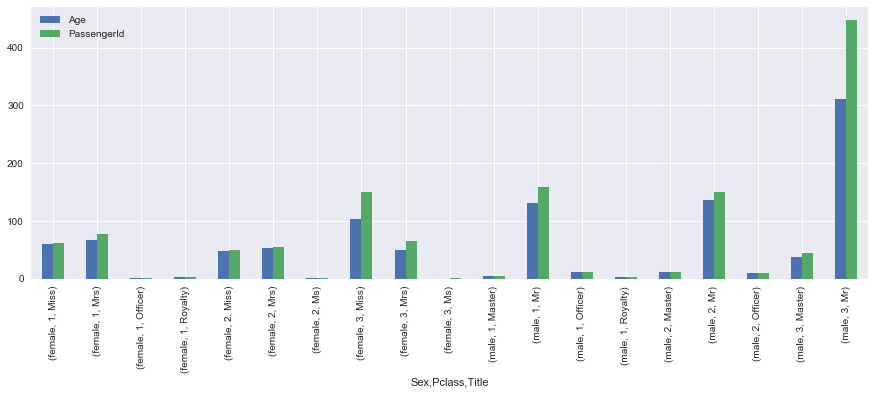

In [291]:
combined.groupby(['Sex', 'Pclass', 'Title'])['Age', 'PassengerId'].count().plot.bar()

Here we plotted against age and passengerId, as passenger ID has non missing values. Apparently it is mostly missing for passengers from class 2, and more for men than for women. Thus, we will fill up the missing values by getting the mean per sex per class. 

In [292]:
combined.loc[891:].tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Royalty
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master


In [293]:
def fill_mean_age(df):
    """
    Fills the mean age per sex per class
    """
    df = df.copy()
    print(df.shape)
    train_avg_age_per_class_df = df.head(891).groupby(['Sex', 'Pclass', 'Title']).median()
    test_avg_age_per_class_df = df.loc[891:].groupby(['Sex', 'Pclass', 'Title']).median()

    print('Number of na\'s in column  age: ', df['Age'].isnull().sum())
    def fill_ages(row, group_mean):
        counter =+ 1
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return group_mean.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                 return group_mean.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                 return group_mean.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                 return group_mean.loc['female', 1, 'Royalty']['Age']
        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return group_mean.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                 return group_mean.loc['female', 2, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                 return group_mean.loc['female', 2, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                 return group_mean.loc['female', 2, 'Royalty']['Age']
        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return group_mean.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                 return group_mean.loc['female', 3, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                 return group_mean.loc['female', 3, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                 return group_mean.loc['female', 3, 'Royalty']['Age']            
        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return group_mean.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                 return group_mean.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                 return group_mean.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                 return group_mean.loc['male', 1, 'Royalty']['Age']
        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return group_mean.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':           
                return group_mean.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                 return group_mean.loc['male', 2, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                 return group_mean.loc['male', 2, 'Royalty']['Age']
        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                 return group_mean.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
#                  print('printing', group_mean.loc['male', 3, 'Mr']['Age'])
                 return group_mean.loc['male', 3, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                 return group_mean.loc['male', 3, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                 return group_mean.loc['male', 3, 'Royalty'] ['Age']          
    
    
    df.head(891).Age =  df.head(891).apply(lambda r: fill_ages(r, train_avg_age_per_class_df) 
                                                                 if np.isnan(r['Age']) else r['Age'], axis = 1)                                                    
    df.loc[891:].Age =  df.iloc[891:].apply(lambda r: fill_ages(r, test_avg_age_per_class_df) 
                                                                 if np.isnan(r['Age']) else r['Age'], axis = 1)
    print('Number of na\'s in column  age: ', df['Age'].isnull().sum())
    print('Counter', counter)
    print("Function OK")
    return df

In [294]:
t = fill_mean_age(combined)
df_transformed['Age'] = t['Age']
df_transformed.info()

(1309, 12)
Number of na's in column  age:  263
Number of na's in column  age:  1
Counter 0
Function OK
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    1309 non-null int64
Name           1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
Sex_male       1309 non-null uint8
Pclass_2       1309 non-null uint8
Pclass_3       1309 non-null uint8
Title          1309 non-null object
dtypes: float64(2), int64(3), object(4), uint8(5)
memory usage: 108.7+ KB


C:\Users\ASLAN01\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


As we can see we have no null values anymore in df_transfomed

The cabin column contains a lot of unknowns. But just throwing out this information might mean that we are throwing out valuable information. Let's get the cabin group by getting the first letter and impute the null values this with the letter "U" for unkown. 

In [295]:
def process_cabin(df):
    df = pd.DataFrame(df)
    df.Cabin = df.Cabin.fillna('U')
    df['Cabin'] = df['Cabin'].map(lambda x: x[0])
    #one hot encoding
    df = one_hot_encoding(['Cabin'], df)
    return df

In [296]:
df_transformed = process_cabin(df_transformed)

In [297]:
print(df_transformed.shape)
df_transformed.head(5)

(1309, 21)


,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Sex_male,...,Pclass_3,Title,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,1,...,1,Mr,0,0,0,0,0,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,...,0,Mrs,0,1,0,0,0,0,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,Miss,0,0,0,0,0,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,1,0,...,0,Mrs,0,1,0,0,0,0,0,0
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,1,...,1,Mr,0,0,0,0,0,0,0,1


Above in the .info() dataframe we see that there is one missing value for the fare. Let's impute that with the mean but without leakage from test/train

In [298]:
def fill_fare(df):
    df = df.copy()
    df.head(891).Fare.fillna(df.head(891).Fare.mean(), inplace=True)
    df.iloc[891:].Fare.fillna(df.iloc[891:].Fare.mean(), inplace=True)
    return df

In [299]:
t = fill_fare(df_transformed)
df_transformed.Fare = t.Fare

C:\Users\ASLAN01\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Let's invetigate the ticket columns

In [300]:
len(np.unique(df_transformed.Ticket))

929

Apparently, some ticket values appear more than once . We can probably extract some information from this. Let's settle for the first letter of each ticket if there is any or return XXX if there is no letter to extract

In [301]:
def process_ticket(df):
    
    df = df.copy()
    
    def extract(ticket_string):
        ticket_string = ticket_string.replace('.','')
        ticket_string = ticket_string.replace('/','')
        ticket_string = ticket_string.split()
#         print(ticket_string)
        ticket_string = list(map(lambda t : t.strip(), ticket_string))
#         print(ticket_string)
        ticket_string = list(filter(lambda t : not t.isdigit(), ticket_string))
        if len(ticket_string) > 0:
            return ticket_string[0]
        else: 
            return 'XXX'
        
    df['Ticket'] = df['Ticket'].map(extract)
    ticket_dummies = pd.get_dummies(df['Ticket'])
    comb = pd.concat([df, ticket_dummies], axis=1)
    comb.drop('Ticket', inplace=True, axis=1)
    return comb

In [302]:
df_transformed = process_ticket(df_transformed)
df_transformed.shape

(1309, 57)

Last columns we have not done anything with yet are Sibsp and parch. Sibsp stands for # of sibling or spouses aboard the Titanic. Parch stands for # parents or children aboard the Titanic. We can easily make one column of this where we count the total number of family members

In [303]:
def process_family(df):
    df = df.copy()
    df['Family'] = df['SibSp'] + df['Parch']
    df = df.drop(['SibSp', 'Parch'], inplace = False, axis=1)
    return df

In [304]:
df_transformed = process_family(df_transformed)


In [305]:
df_transformed.shape

(1309, 56)

In [306]:
df_transformed.columns

Index(['PassengerId', 'Name', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S',
       'Sex_male', 'Pclass_2', 'Pclass_3', 'Title', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'A',
       'A4', 'A5', 'AQ3', 'AQ4', 'AS', 'C', 'CA', 'CASOTON', 'FC', 'FCC', 'Fa',
       'LINE', 'LP', 'PC', 'PP', 'PPP', 'SC', 'SCA3', 'SCA4', 'SCAH', 'SCOW',
       'SCPARIS', 'SCParis', 'SOC', 'SOP', 'SOPP', 'SOTONO2', 'SOTONOQ', 'SP',
       'STONO', 'STONO2', 'STONOQ', 'SWPP', 'WC', 'WEP', 'XXX', 'Family'],
      dtype='object')

In [307]:
t = pd.get_dummies(df_transformed['Title'], prefix='Title')
df_transformed = pd.concat([df_transformed, t], axis=1)

In [309]:
df_transformed.drop(['Name', 'Title'], inplace=True, axis=1)

I believe we are done now with the feature engineering part of the process. Let's train some models!

# Model Training

In [310]:
df_cleaned = df_transformed.set_index('PassengerId', drop=True, inplace=False)

In [311]:
df_cleaned.head()

,Age,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3,Cabin_B,Cabin_C,Cabin_D,...,WEP,XXX,Family,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Officer,Title_Royalty
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,38.0,71.2833,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,26.0,7.9250,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,35.0,53.1000,0,1,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0
5,35.0,8.0500,0,1,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [312]:
df_cleaned.columns

Index(['Age', 'Fare', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'Pclass_2',
       'Pclass_3', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U', 'A', 'A4', 'A5', 'AQ3', 'AQ4', 'AS',
       'C', 'CA', 'CASOTON', 'FC', 'FCC', 'Fa', 'LINE', 'LP', 'PC', 'PP',
       'PPP', 'SC', 'SCA3', 'SCA4', 'SCAH', 'SCOW', 'SCPARIS', 'SCParis',
       'SOC', 'SOP', 'SOPP', 'SOTONO2', 'SOTONOQ', 'SP', 'STONO', 'STONO2',
       'STONOQ', 'SWPP', 'WC', 'WEP', 'XXX', 'Family', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Officer',
       'Title_Royalty'],
      dtype='object')

First let's establish a baseline model. 

In [313]:
df_train_set['Survived'].sum()/len(df_train_set['Survived'])

0.3838383838383838

We see that the ratio of survival sits at 38%. In other words, 38.4 % survived the Titanic and 61.6 % did not. Therefore, if were to say that everyone does (output = 0) we would have an accuracy of 61.6%. 

Let's start with a basic decision tree and see if we can reduce the dimensions by inspecting the feature importance of each column

## Decision Tree

In [314]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import train_test_split, cross_val_score

X_train = df_cleaned.head(891)
X_test = df_cleaned.loc[891:]

y_train = df_train_set['Survived'].values

In [343]:
dt_classifier = DT(criterion ='entropy', splitter='random', max_depth = 10, min_samples_split=3)

scores = cross_val_score(dt_classifier, X_train, y=y_train, cv=5)
print(scores.mean(), scores)

0.813731817332 [ 0.78212291  0.80446927  0.83707865  0.83707865  0.8079096 ]


In [347]:
dt_classifier.fit(X_train, y_train)
feature_importances = dt_classifier.feature_importances_

In [352]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = feature_importances
features.sort_values(by=['importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)

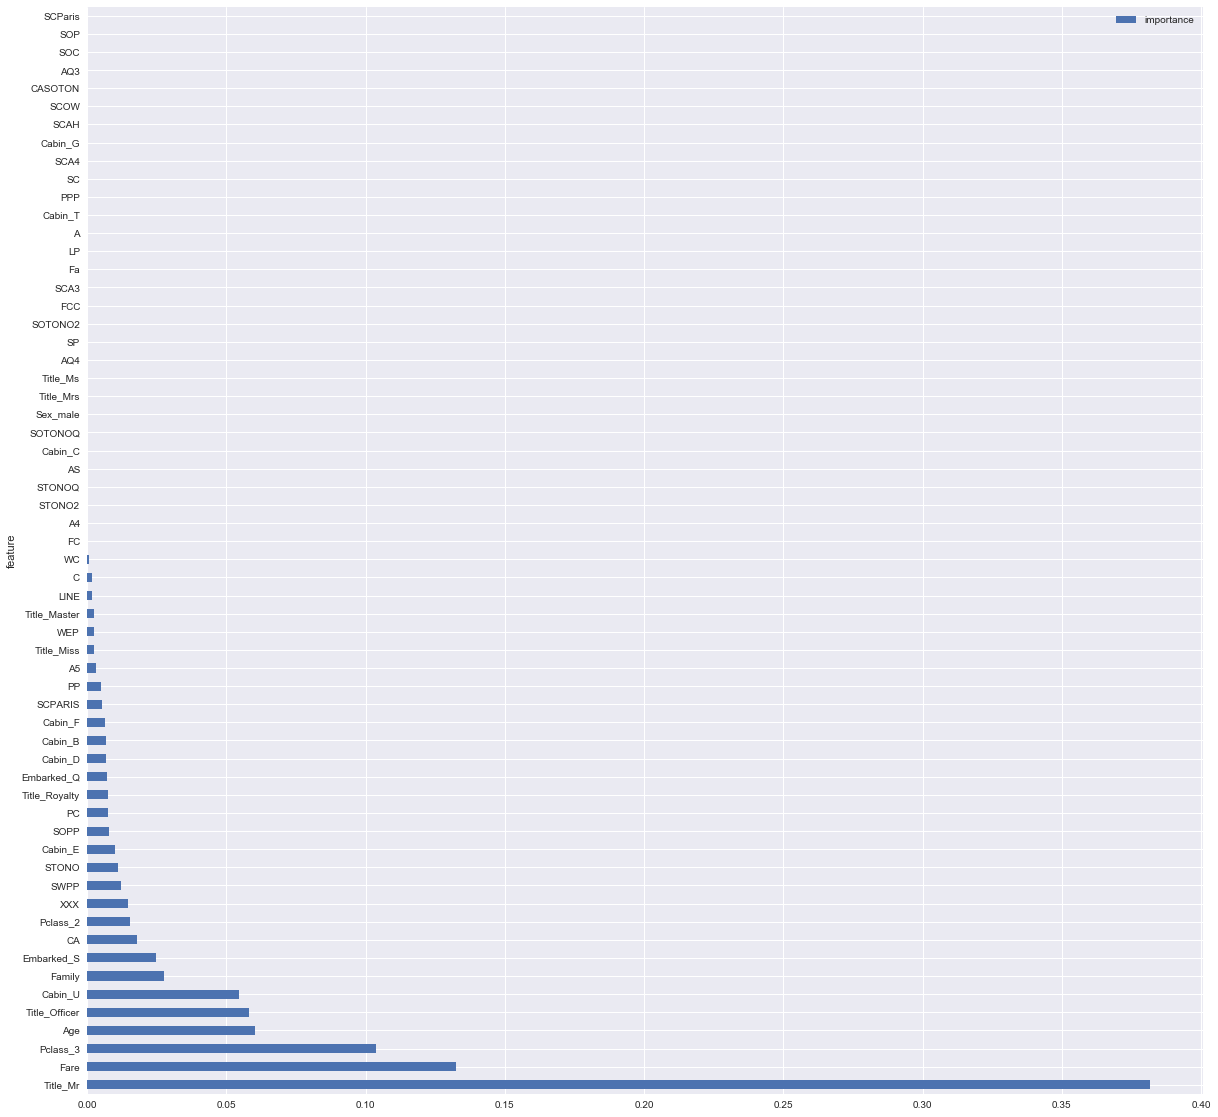

In [355]:
features.plot(kind='barh', figsize=(20, 20))

In [358]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(dt_classifier, prefit=True)
train_reduced = model.transform(X_train)
train_reduced.shape

(891, 9)

In [388]:
X_test

,Age,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3,Cabin_B,Cabin_C,Cabin_D,...,WEP,XXX,Family,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Officer,Title_Royalty
PassengerId,,,,,,,,,,,,,,,,,,,,,
891,32.0,7.7500,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
892,22.0,7.8292,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
893,38.0,7.0000,0,1,0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
894,26.0,9.6875,1,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
895,35.0,8.6625,0,1,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
896,35.0,12.2875,0,1,0,0,1,0,0,0,...,0,1,2,0,0,0,1,0,0,0
897,26.0,9.2250,0,1,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
898,54.0,7.6292,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
899,2.0,29.0000,0,1,1,1,0,0,0,0,...,0,1,2,0,0,1,0,0,0,0


In [386]:
def output_model(clf, X_test, output_name, X_train=X_train, y_train=y_train, fit=False):
    print('In model')
    if fit:
        clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    inp = {}
    inp['PassengerId'] = X_test.index
    print(len(inp['PassengerId']))

    inp['Survived'] = pred
    print(len(inp['Survived']))
#     print(len(pred))
#     print(pred)
    df = pd.DataFrame(inp)
    print(df.shape)
    return df

In [387]:
output_model(dt_classifier, X_test, '')

In model
419
419
(419, 2)


,PassengerId,Survived
0,891,0
1,892,0
2,893,0
3,894,0
4,895,0
5,896,0
6,897,0
7,898,0
8,899,0
9,900,1


In [365]:
print('A')

A
